In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.io
import cmocean 
import sys
sys.path.insert(1, '/Users/emmagurcan/Documents/France/ENS/M1/stageM1/analysis')
import fonctions as f
import matplotlib.ticker as ticker


In [4]:
rep = '/Users/emmagurcan/Documents/France/ENS/M1/stageM1'
uCTD = scipy.io.loadmat(rep+'/Data/Data_MSM40/UCTD_dataproc.mat')
adcp = scipy.io.loadmat(rep +'/Data/Data_MSM40/adcp_150kHz/TL_GEOMAR_150_STJOHNS_BREST_000_000000_6_hc.mat')

In [5]:
# Define the section (section 2 can't be plotted => no uCTD measures)
section_index = 3
start_index, end_index, len_section, start_index_adcp, end_index_adcp = f.section(section_index)
name = f'section_{section_index}'

In [6]:
# Define depth limit for uCTD
depth_max=300

# Define depth limit for ADCP
depth_max_adcp=300

# Create depth array
depth = np.arange(0, 1001)

In [7]:
# CTD data
lon = np.squeeze(uCTD['uctdlon'])[start_index:end_index+1]
lat = np.squeeze(uCTD['uctdlat'])[start_index:end_index+1]
PT = np.squeeze(uCTD['PTgrid'])[:,start_index:end_index+1]
PD = np.squeeze(uCTD['PDgrid'])[:,start_index:end_index+1]
S = np.squeeze(uCTD['Sgrid'])[:,start_index:end_index+1]

In [8]:
PT.shape

(1001, 21)

In [9]:
# Select adcp data
b = adcp['b']
bb = b[0,0]
ref = bb[0][0,0][0]
nav = bb[2][0,0][0]
vel = bb[1]
u = vel[:,0,:] + ref[0,:] # vitesse zonale, positive vers l'est
v = vel[:,1,:] + ref[1,:] # vitesse méridionale, positive vers le nord
depth_adcp = bb[3][0]
LON_adcp = nav[1,:]
LAT_adcp = nav[2,:]
LAT = LAT_adcp[start_index_adcp:end_index_adcp+1]
LON = LON_adcp[start_index_adcp:end_index_adcp+1]
u_section = u[:,start_index_adcp:end_index_adcp+1]
v_section = v[:,start_index_adcp:end_index_adcp+1]

In [10]:
# Calculate distances
d1 = np.sin(lat*(math.pi/180))*np.sin(lat[0]*(math.pi/180))
d2 = np.cos(lat*(math.pi/180))*np.cos(lat[0]*(math.pi/180)) * \
    np.cos(abs(lon[0]-lon)*(math.pi/180))
distance = 6371*np.arccos(d1+d2)

d1_adcp = np.sin(LAT*(math.pi/180))*np.sin(LAT[0]*(math.pi/180))
d2_adcp = np.cos(LAT*(math.pi/180))*np.cos(LAT[0]*(math.pi/180)) * \
    np.cos(abs(LON[0]-LON)*(math.pi/180))
distance_adcp = 6371*np.arccos(d1_adcp+d2_adcp)

# Calculate orthogonal velocity
a1 = 6371*np.arccos(np.sin(LAT[-1]*(math.pi/180))*np.sin(LAT[0]*(math.pi/180))+np.cos(LAT[-1]*(math.pi/180))*np.cos(LAT[0]*(math.pi/180)))
b1 = 6371*np.arccos(np.sin(LAT[-1]*(math.pi/180))*np.sin(LAT[-1]*(math.pi/180))+np.cos(LAT[-1]*(math.pi/180))*np.cos(LAT[-1]*(math.pi/180))*np.cos(abs(LON[-1]-LON[0])*(math.pi/180)))
alpha = np.arctan(a1/b1)
v_ortho = np.cos(alpha)*u_section + np.sin(alpha)*v_section


In [11]:
v_ortho.shape

(37, 2839)

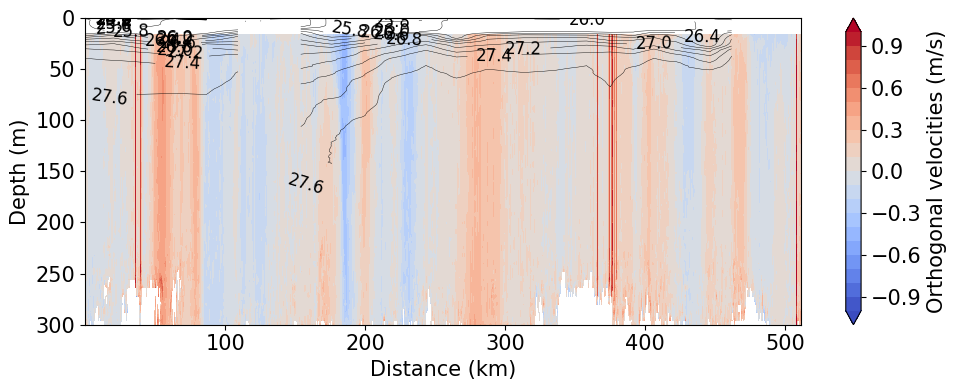

In [12]:
plt.figure(figsize=(10,4))

# Plot Velocity
levels_velocity=np.arange(-1,1.1,0.1)
V_plot = plt.contourf(distance_adcp, depth_adcp, v_ortho,levels=levels_velocity, cmap='coolwarm',extend='both')
cbar=plt.colorbar(V_plot)
cbar.set_label('Orthogonal velocities (m/s)',fontsize=15)
cbar.ax.tick_params(labelsize=15)

contour_levels = np.arange(23, 28, 0.2)

contour_lines = plt.contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,depth_max_adcp)
plt.xlabel('Distance (km)',fontsize=15)
plt.ylabel('Depth (m)',fontsize=15)
plt.gca().invert_yaxis() 

plt.tight_layout()

# plt.savefig('section5_velocities.png')

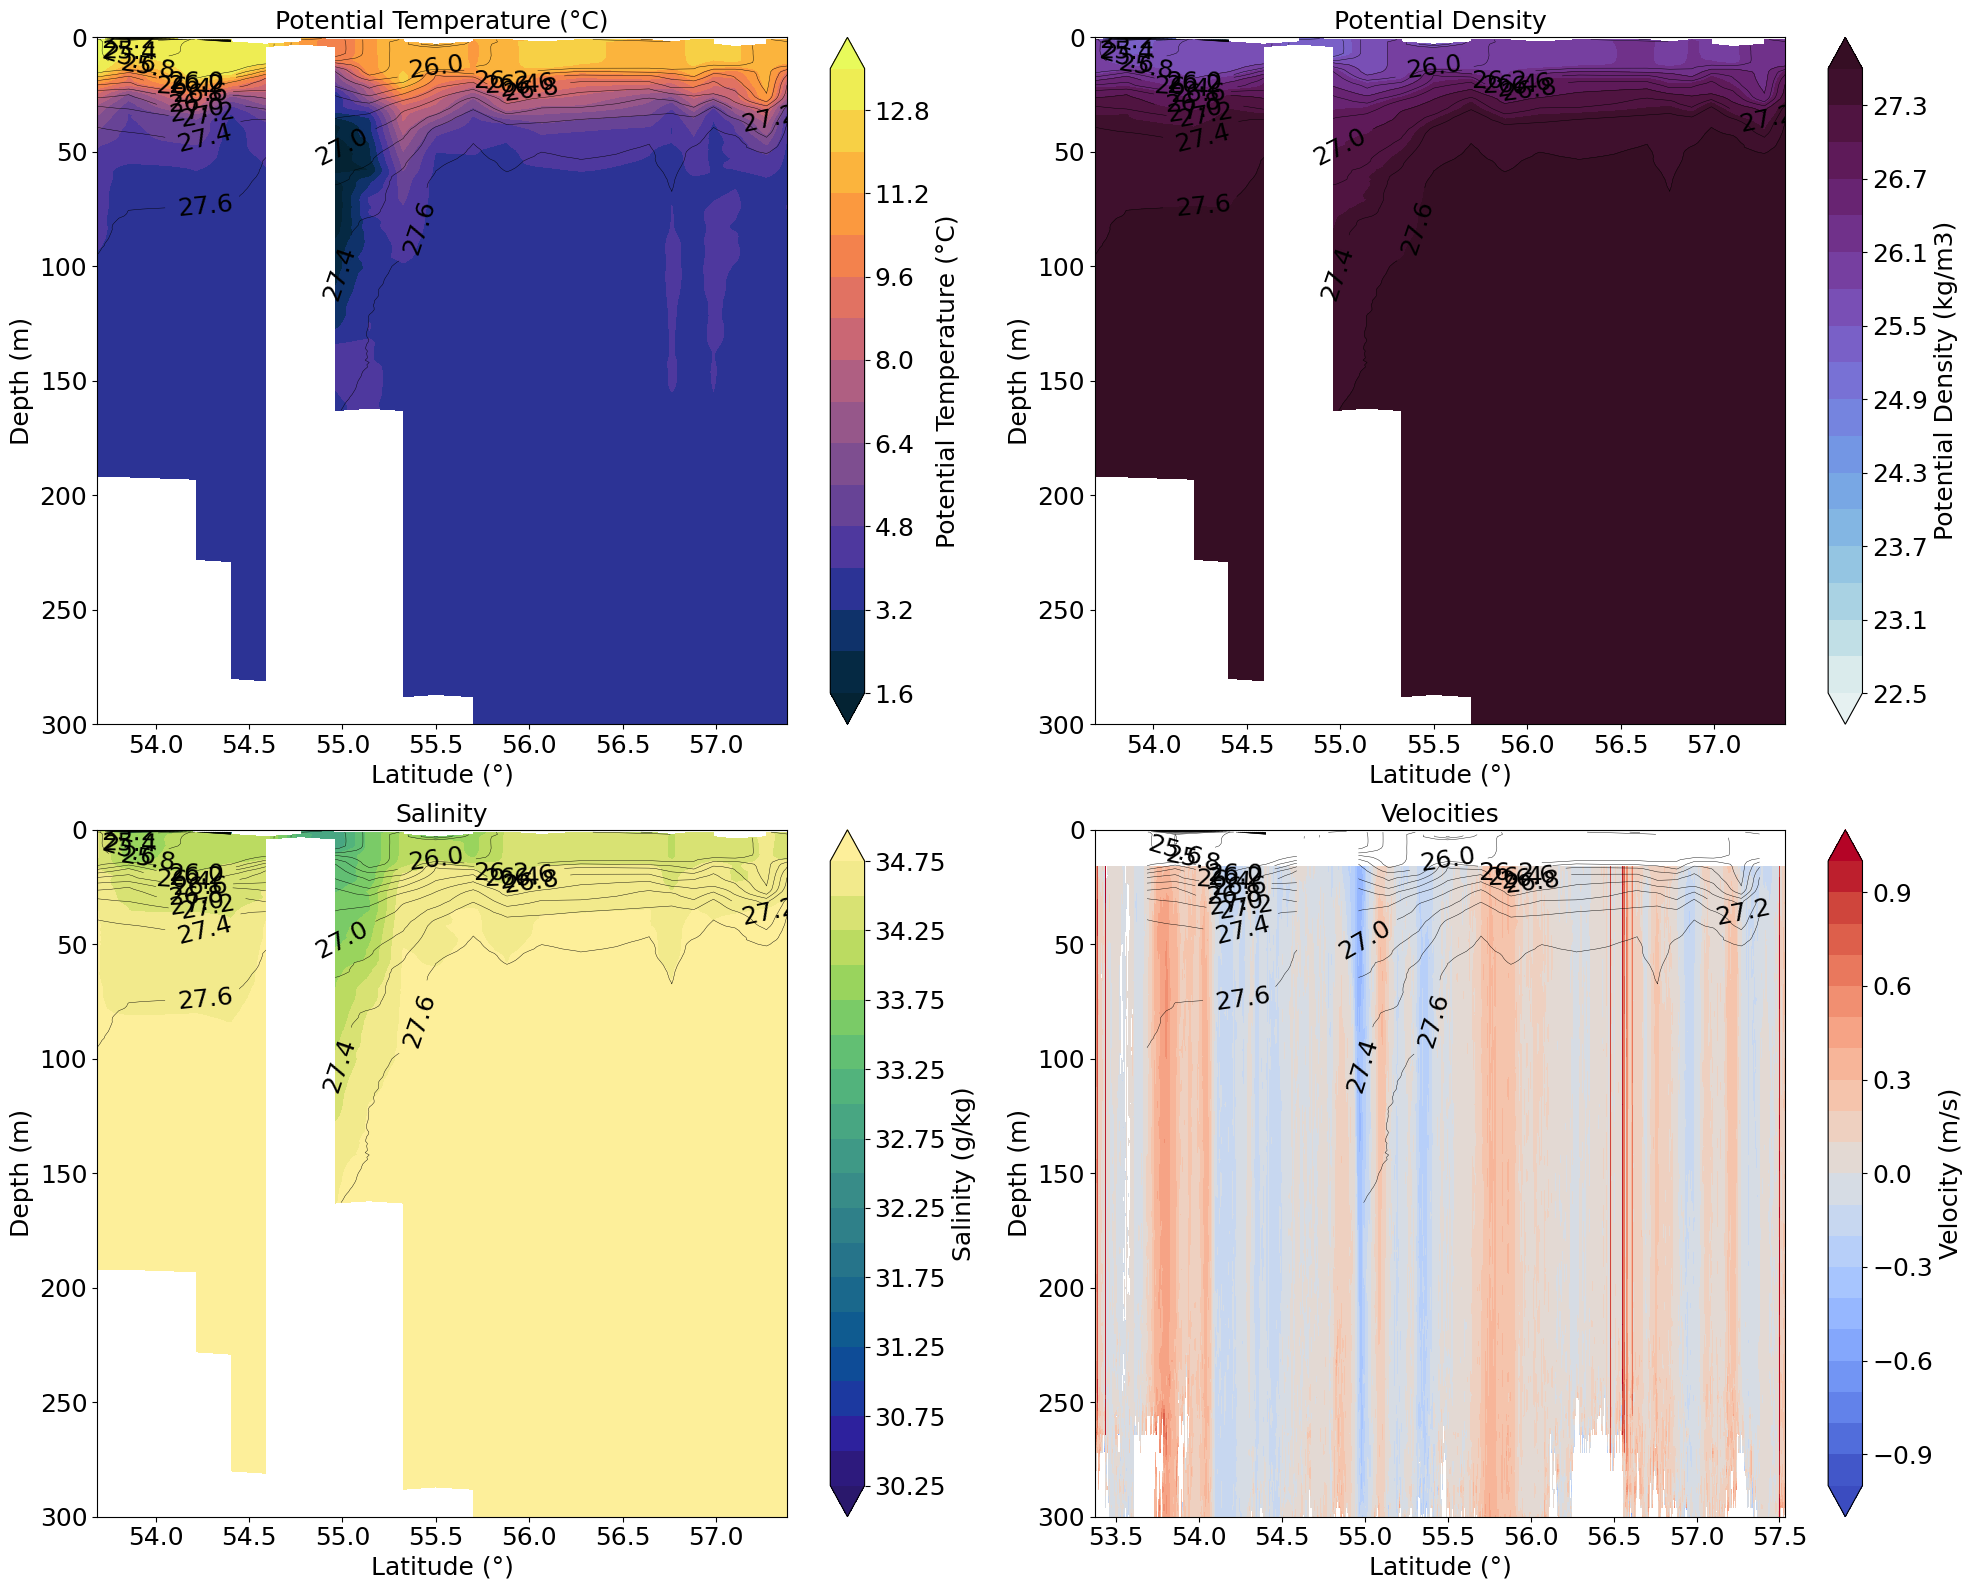

In [13]:
# Plot the figure
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Definition of x 
if section_index < 4:
    x_uctd = lat
    x_adcp = LAT
    x_name = 'Latitude (°)'
else:
    x_uctd = lon
    x_adcp = LON
    x_name = 'Longitude (°)'

# Plot Potential Temperature
PT_plot = ax[0, 0].contourf(x_uctd, depth, PT,levels=20, cmap='cmo.thermal',extend='both')
cbar1 = fig.colorbar(PT_plot, ax=ax[0, 0])
cbar1.set_label('Potential Temperature (°C)',fontsize=18)
cbar1.ax.tick_params(labelsize=18)
ax[0, 0].set_ylim(0,depth_max)
ax[0, 0].set_xlabel(f'{x_name}',fontsize=18)
ax[0, 0].set_ylabel('Depth (m)',fontsize=18)
ax[0, 0].set_title('Potential Temperature (°C)',fontsize=18)
ax[0, 0].invert_yaxis()  
ax[0, 0].tick_params(axis='both', which='major', labelsize=18)

# Plot Potential Density
PD_plot = ax[0, 1].contourf(x_uctd, depth, PD, levels=20, cmap='cmo.dense',extend='both')
cbar2 = fig.colorbar(PD_plot, ax=ax[0, 1])
cbar2.set_label('Potential Density (kg/m3)',fontsize=18)
cbar2.ax.tick_params(labelsize=18)
ax[0, 1].set_ylim(0,depth_max)
ax[0, 1].set_xlabel(f'{x_name}',fontsize=18)
ax[0, 1].set_ylabel('Depth (m)',fontsize=18)
ax[0, 1].set_title('Potential Density',fontsize=18)
ax[0, 1].invert_yaxis()
ax[0, 1].tick_params(axis='both', which='major', labelsize=18)  

# Plot Salinity
S_plot = ax[1, 0].contourf(x_uctd, depth, S,levels=20, cmap='cmo.haline',extend='both')
cbar3 = fig.colorbar(S_plot, ax=ax[1, 0], label='Salinity (g/kg)')
cbar3.set_label('Salinity (g/kg)',fontsize=18)
cbar3.ax.tick_params(labelsize=18)
ax[1, 0].set_ylim(0,depth_max)
ax[1, 0].set_xlabel(f'{x_name}',fontsize=18)
ax[1, 0].set_ylabel('Depth (m)',fontsize=18)
ax[1, 0].set_title('Salinity',fontsize=18)
ax[1, 0].invert_yaxis() 
ax[1, 0].tick_params(axis='both', which='major', labelsize=18)

# Plot Velocity
levels_velocity=np.arange(-1,1.1,0.1)
V_plot = ax[1, 1].contourf(x_adcp, depth_adcp, v_ortho,levels=levels_velocity, cmap='coolwarm',extend='both')
cbar4 = fig.colorbar(V_plot, ax=ax[1, 1], label='Velocity (m/s)')
cbar4.set_label('Velocity (m/s)',fontsize=18)
cbar4.ax.tick_params(labelsize=18)
ax[1, 1].set_ylim(0,depth_max_adcp)
ax[1, 1].set_xlabel(f'{x_name}',fontsize=18)
ax[1, 1].set_ylabel('Depth (m)',fontsize=18)
ax[1, 1].set_title('Velocities',fontsize=18)
ax[1, 1].invert_yaxis() 
ax[1, 1].tick_params(axis='both', which='major', labelsize=18)

# Add isopycnes contours
contour_levels = np.arange(23, 28, 0.2)
contour_lines1 = ax[0, 0].contour(x_uctd, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
contour_lines2 = ax[1, 0].contour(x_uctd, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
contour_lines3 = ax[0, 1].contour(x_uctd, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
contour_lines4 = ax[1, 1].contour(x_uctd, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[0, 0].clabel(contour_lines1, inline=True, fmt='%1.1f', fontsize=18)
ax[0, 1].clabel(contour_lines2, inline=True, fmt='%1.1f', fontsize=18)
ax[1, 0].clabel(contour_lines3, inline=True, fmt='%1.1f', fontsize=18)
ax[1, 1].clabel(contour_lines4, inline=True, fmt='%1.1f', fontsize=18)

plt.tight_layout()

<a list of 27 text.Text objects>

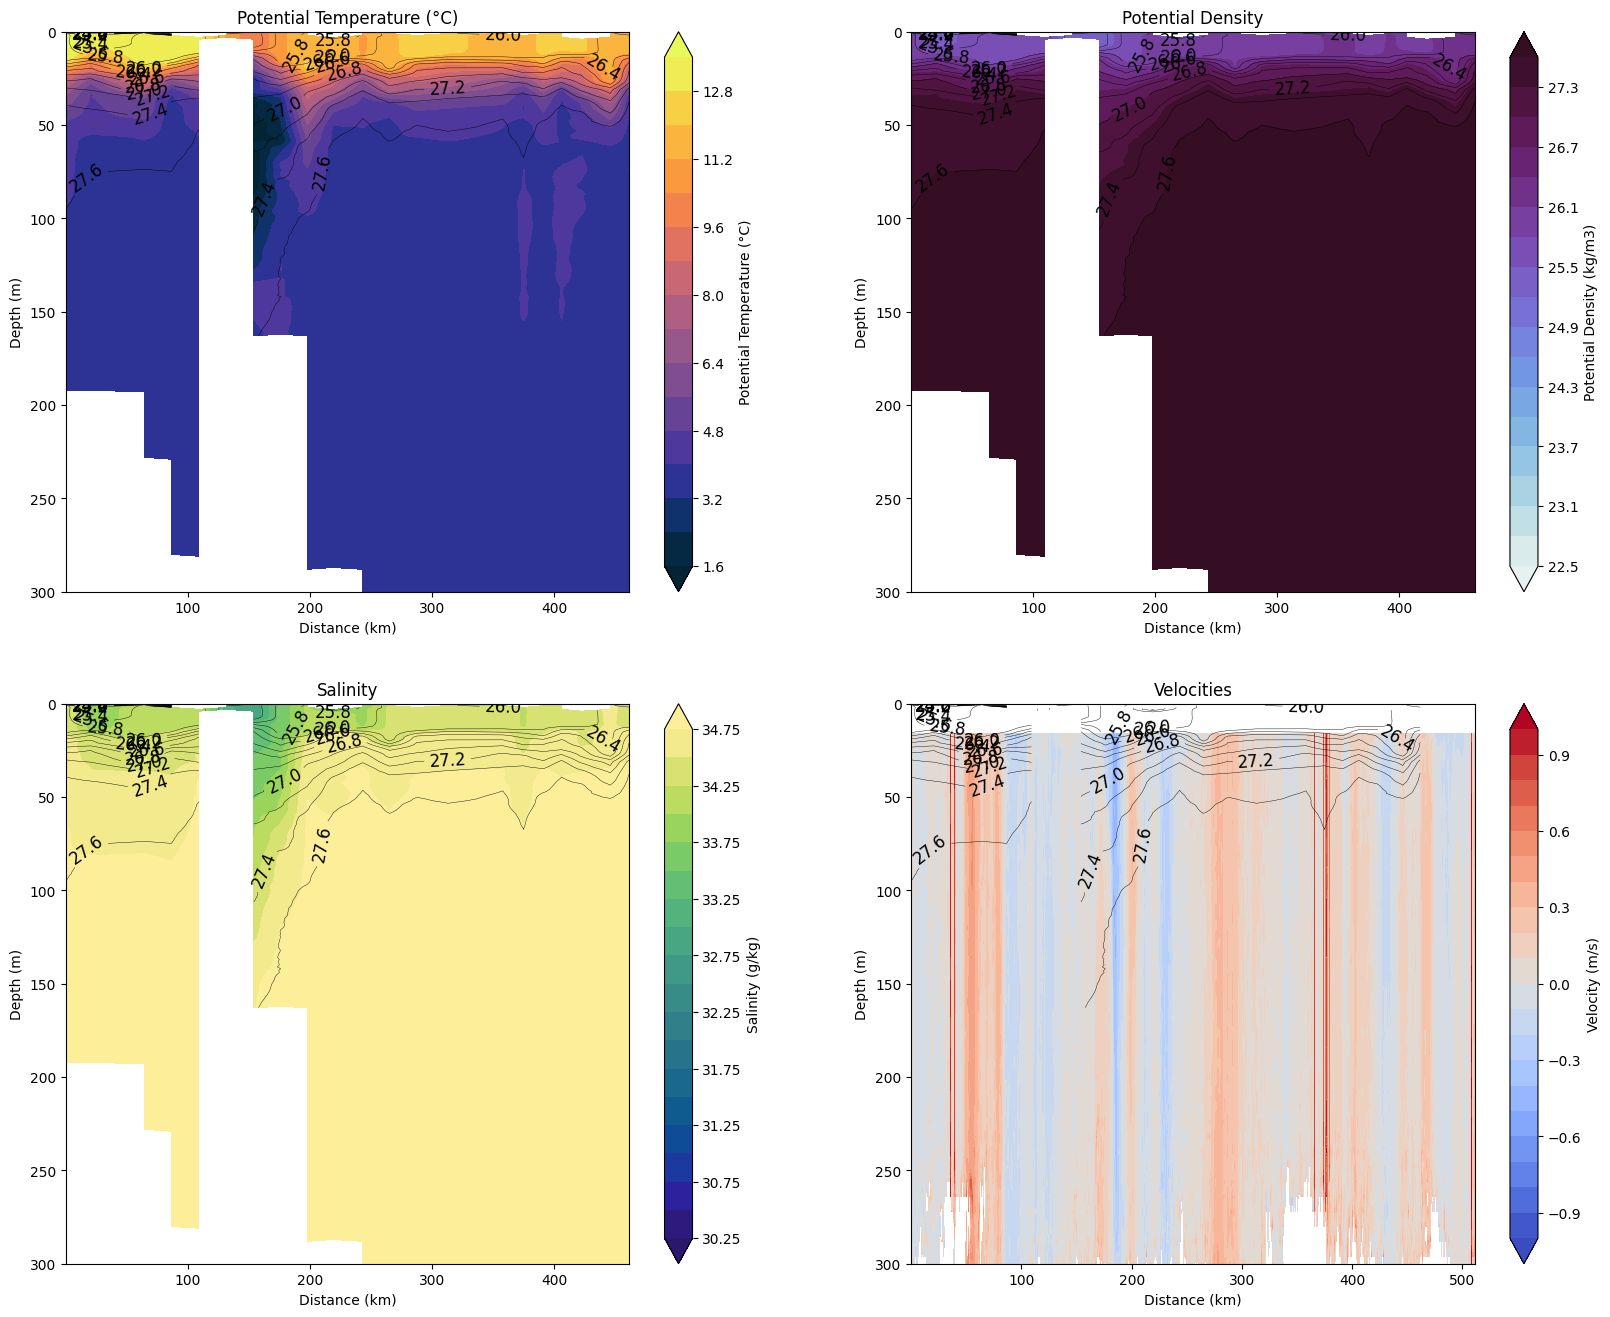

In [14]:

# Plot the figure
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Plot Potential Temperature
PT_plot = ax[0, 0].contourf(distance, depth, PT,levels=20, cmap='cmo.thermal',extend='both')
fig.colorbar(PT_plot, ax=ax[0, 0], label='Potential Temperature (°C)')
ax[0, 0].set_ylim(0,depth_max)
ax[0, 0].set_xlabel('Distance (km)')
ax[0, 0].set_ylabel('Depth (m)')
ax[0, 0].set_title('Potential Temperature (°C)')
ax[0, 0].invert_yaxis()  

# Plot Potential Density
PD_plot = ax[0, 1].contourf(distance, depth, PD, levels=20, cmap='cmo.dense',extend='both')
fig.colorbar(PD_plot, ax=ax[0, 1], label='Potential Density (kg/m3)')
ax[0, 1].set_ylim(0,depth_max)
ax[0, 1].set_xlabel('Distance (km)')
ax[0, 1].set_ylabel('Depth (m)')
ax[0, 1].set_title('Potential Density')
ax[0, 1].invert_yaxis()  

# Plot Salinity
S_plot = ax[1, 0].contourf(distance, depth, S,levels=20, cmap='cmo.haline',extend='both')
fig.colorbar(S_plot, ax=ax[1, 0], label='Salinity (g/kg)')
ax[1, 0].set_ylim(0,depth_max)
ax[1, 0].set_xlabel('Distance (km)')
ax[1, 0].set_ylabel('Depth (m)')
ax[1, 0].set_title('Salinity')
ax[1, 0].invert_yaxis() 

# Plot Velocity
levels_velocity=np.arange(-1,1.1,0.1)
V_plot = ax[1, 1].contourf(distance_adcp, depth_adcp, v_ortho,levels=levels_velocity, cmap='coolwarm',extend='both')
fig.colorbar(V_plot, ax=ax[1, 1], label='Velocity (m/s)')
ax[1, 1].set_ylim(0,depth_max_adcp)
ax[1, 1].set_xlabel('Distance (km)')
ax[1, 1].set_ylabel('Depth (m)')
ax[1, 1].set_title('Velocities')
ax[1, 1].invert_yaxis() 

# Add isopycnes contours
contour_levels = np.arange(23, 28, 0.2)
contour_lines = ax[0, 0].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[0, 0].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)
contour_lines = ax[1, 0].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[0, 1].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)
contour_lines = ax[0, 1].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[1, 0].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)
contour_lines = ax[1, 1].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[1, 1].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)

In [15]:
distance_min=400
distance_max=500

# For only a portion of the graph
indices = np.where((distance>distance_min) & (distance<distance_max))
distance=distance[indices]
PT=PT.T[indices].T
PD=PD.T[indices].T
S=S.T[indices].T
indices_adcp = np.where((distance_adcp>distance_min) & (distance_adcp<distance_max))
distance_adcp=distance_adcp[indices_adcp]
v_ortho = v_ortho[:, indices_adcp].squeeze(axis=1)
v_section=v_section.T[indices_adcp].T

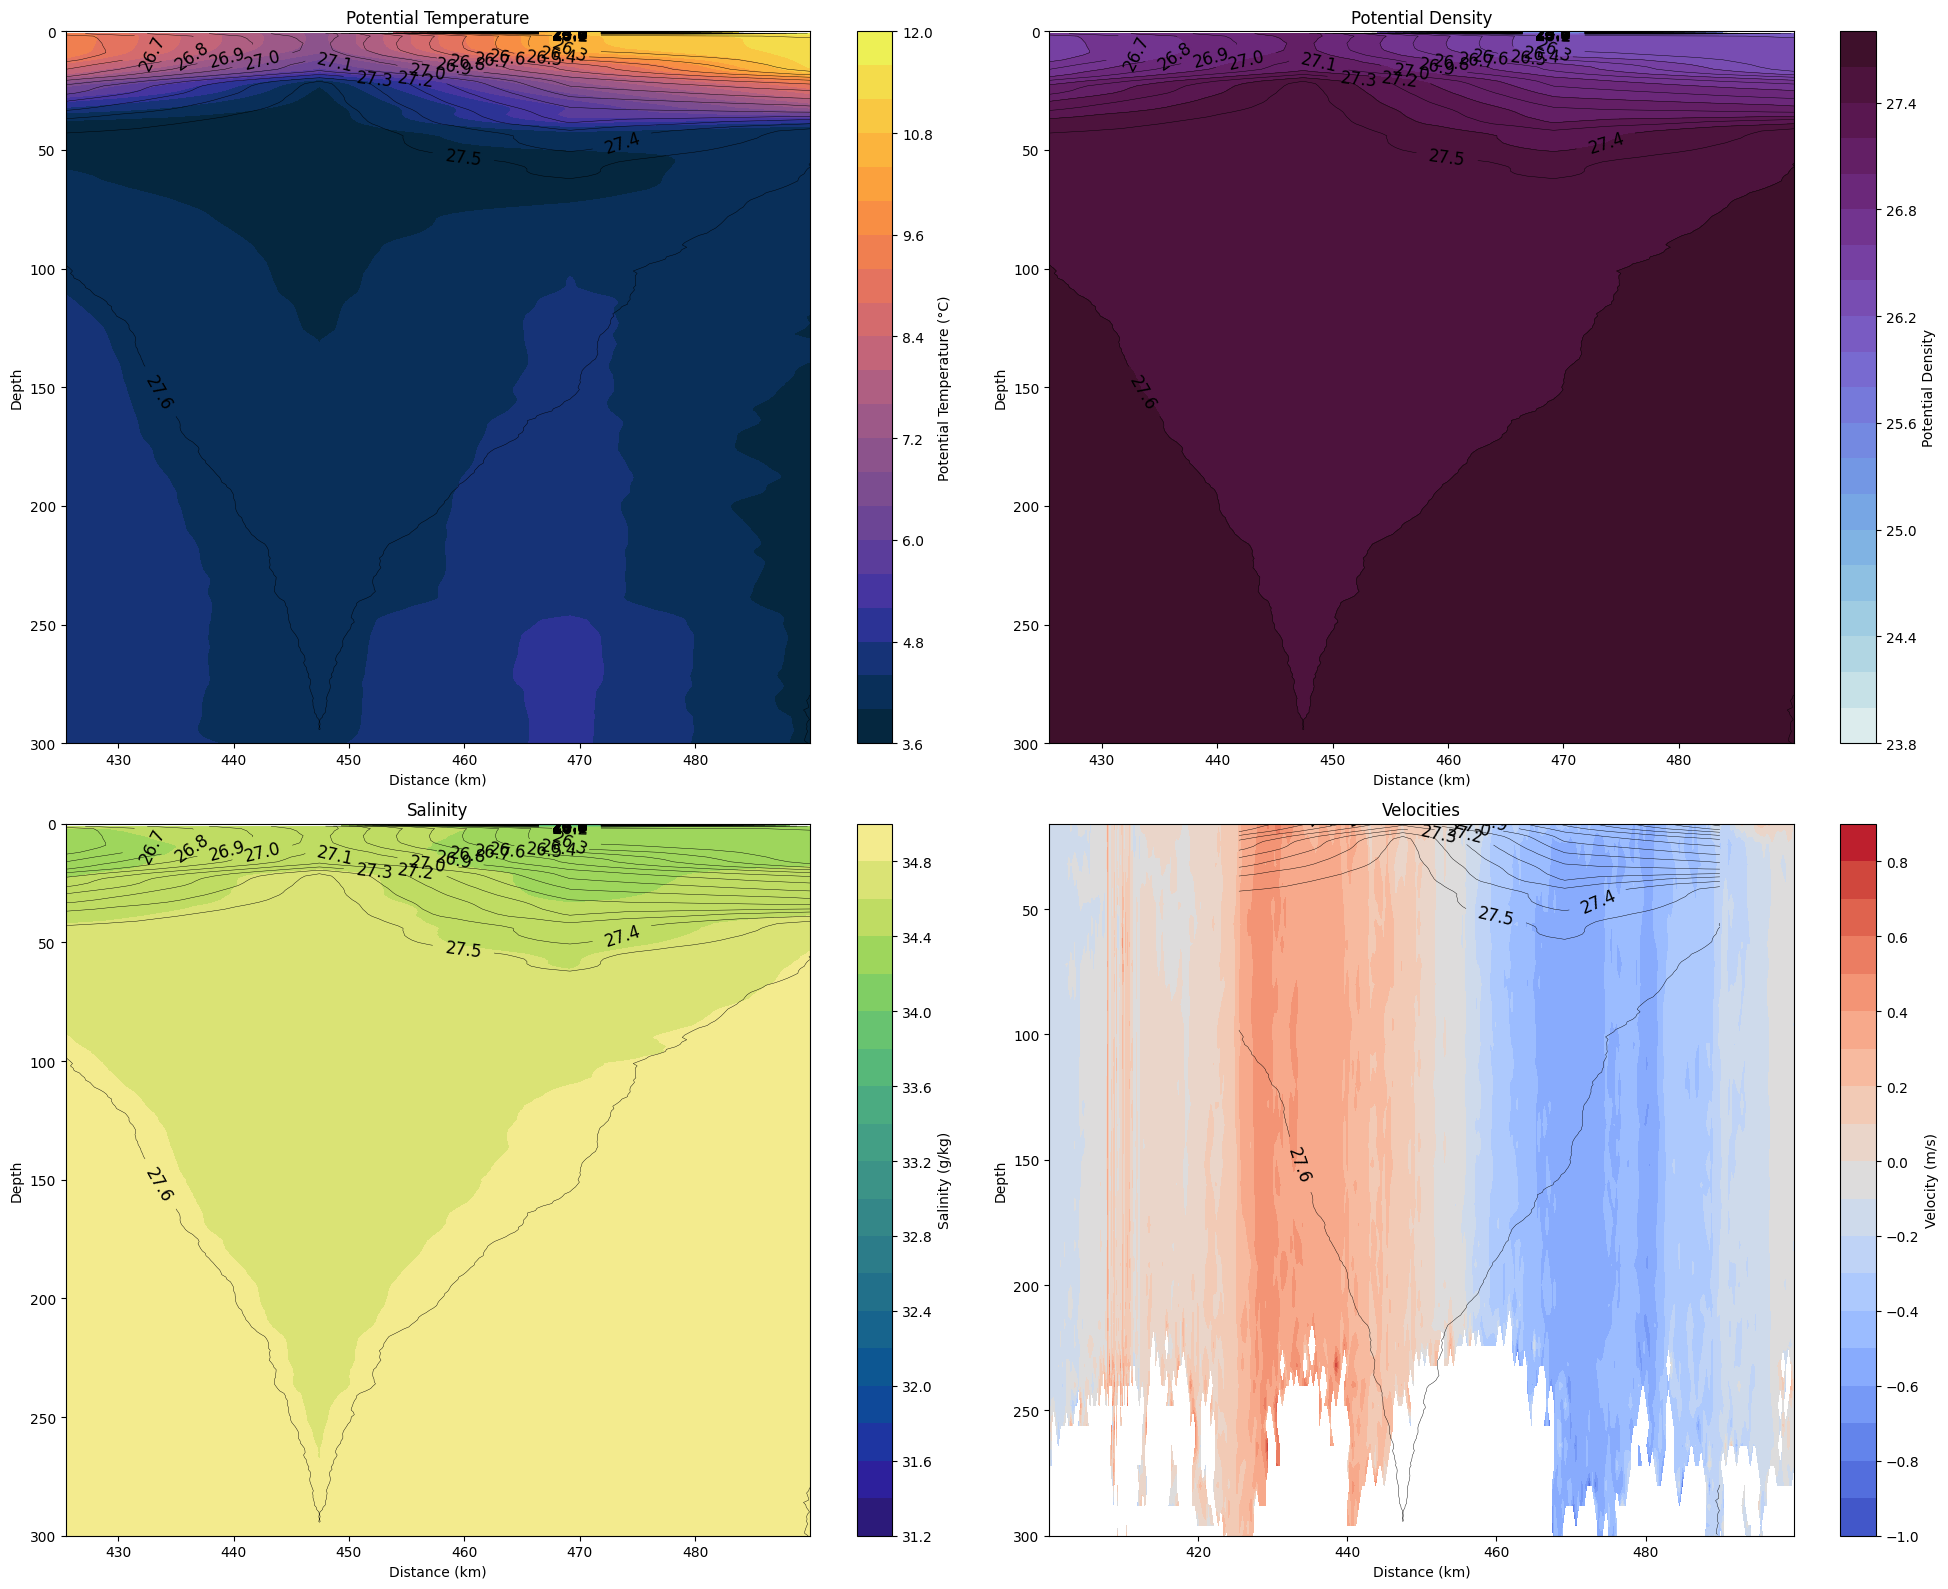

In [27]:
# Plot the figure
fig, ax = plt.subplots(2, 2, figsize=(20, 16))

# Plot Potential Temperature
PT_plot = ax[0, 0].contourf(distance, depth, PT,levels=20, cmap='cmo.thermal')
fig.colorbar(PT_plot, ax=ax[0, 0], label='Potential Temperature (°C)')

ax[0, 0].set_ylim(0,300)
ax[0, 0].set_xlabel('Distance (km)')
ax[0, 0].set_ylabel('Depth')
ax[0, 0].set_title('Potential Temperature')
ax[0, 0].invert_yaxis()  

# Plot Potential Density
PD_plot = ax[0, 1].contourf(distance, depth, PD, levels=20, cmap='cmo.dense')
fig.colorbar(PD_plot, ax=ax[0, 1], label='Potential Density')

ax[0, 1].set_ylim(0,300)
ax[0, 1].set_xlabel('Distance (km)')
ax[0, 1].set_ylabel('Depth')
ax[0, 1].set_title('Potential Density')
ax[0, 1].invert_yaxis()  

# Plot Salinity
S_plot = ax[1, 0].contourf(distance, depth, S,levels=20, cmap='cmo.haline')
fig.colorbar(S_plot, ax=ax[1, 0], label='Salinity (g/kg)')

ax[1, 0].set_ylim(0,300)
ax[1, 0].set_xlabel('Distance (km)')
ax[1, 0].set_ylabel('Depth')
ax[1, 0].set_title('Salinity')
ax[1, 0].invert_yaxis() 

# Plot Velocity
levels_velocity=np.arange(-1,1,0.1)
V_plot = ax[1, 1].contourf(distance_adcp, depth_adcp, v_ortho,levels=levels_velocity, cmap='coolwarm')
fig.colorbar(V_plot, ax=ax[1, 1], label='Velocity (m/s)')
ax[1, 1].set_ylim(16,300)

ax[1, 1].set_xlabel('Distance (km)')
ax[1, 1].set_ylabel('Depth')
ax[1, 1].set_title('Velocities')
ax[1, 1].invert_yaxis() 

# Add isopycnes contours
contour_levels = np.arange(23, 28, 0.1)
contour_lines = ax[0, 0].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[0, 0].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)
contour_lines = ax[1, 0].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[0, 1].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)
contour_lines = ax[0, 1].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[1, 0].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)
contour_lines = ax[1, 1].contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax[1, 1].clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)

plt.tight_layout()

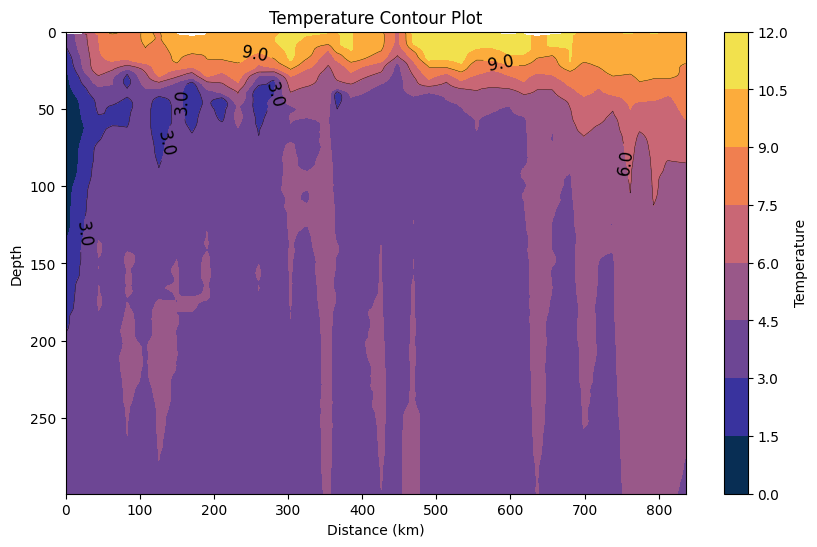

In [28]:
# Define the section (here section 3)
start_index = 66
end_index = 105

# Create depth array
max_depth = 300
depth = np.arange(0, max_depth)

lon = np.squeeze(uCTD['uctdlon'])[start_index:end_index]
lat = np.squeeze(uCTD['uctdlat'])[start_index:end_index]
PT = np.squeeze(uCTD['PTgrid'])[:max_depth, start_index:end_index]
PD = np.squeeze(uCTD['PDgrid'])[:max_depth, start_index:end_index]
S = np.squeeze(uCTD['Sgrid'])[:max_depth, start_index:end_index]

# Calculate distances
d1 = np.sin(lat*(math.pi/180))*np.sin(lat[0]*(math.pi/180))
d2 = np.cos(lat*(math.pi/180))*np.cos(lat[0]*(math.pi/180)) * \
    np.cos(abs(lon[0]-lon)*(math.pi/180))
distance = 6371*np.arccos(d1+d2)

# Create meshgrid of depth and distance
distance_matrix, depth_matrix = np.meshgrid(distance, depth)


# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(distance_matrix, depth_matrix, PT, cmap='cmo.thermal')
plt.colorbar(label='Temperature')

# Add iso-velocity contours
contour_levels = np.arange(0, 14, 3)
contour_lines = plt.contour(distance_matrix, depth_matrix, PT, levels=contour_levels, colors='k', linewidths=0.3)
plt.clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)

plt.xlabel('Distance (km)')
plt.ylabel('Depth')
plt.title('Temperature Contour Plot')
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.show()

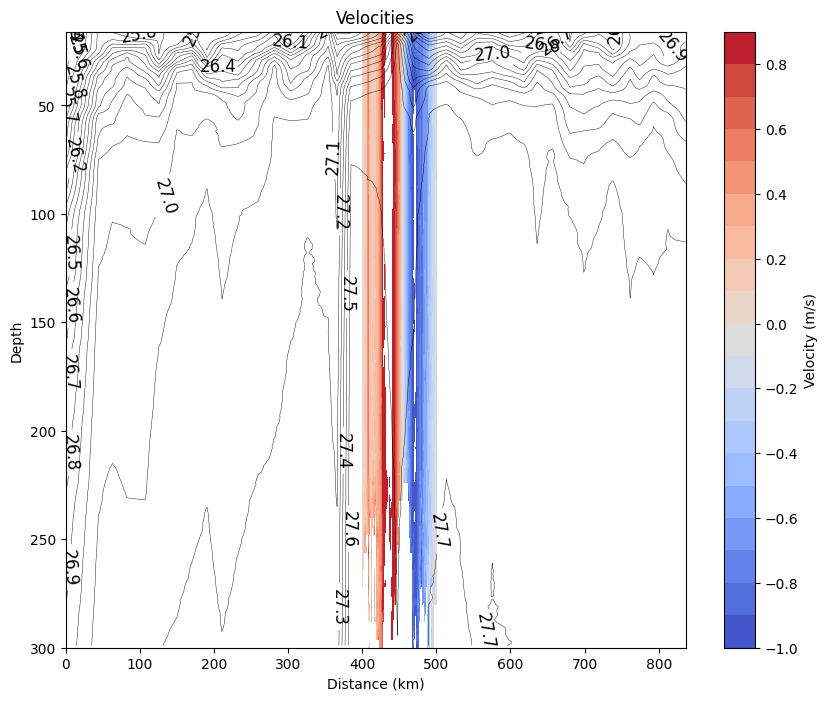

In [29]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))  # No indexing needed for a single axis

# Define velocity levels for contour plot
levels_velocity = np.arange(-1, 1, 0.1)

# Create filled contour plot
V_plot = ax.contourf(distance_adcp, depth_adcp, v_section, levels=levels_velocity, cmap='coolwarm')

# Add colorbar
fig.colorbar(V_plot, ax=ax, label='Velocity (m/s)')

# Set depth limits
ax.set_ylim(16, 300)

# Add isopycnal contours
contour_levels = np.arange(23, 28, 0.1)
contour_lines = ax.contour(distance, depth, PD, levels=contour_levels, colors='k', linewidths=0.3)
ax.clabel(contour_lines, inline=True, fmt='%1.1f', fontsize=12)

# Axis labels, title, and inversion
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Depth')
ax.set_title('Velocities')
ax.invert_yaxis()  # Depth increases downward

# Show the plot at the end
plt.show()
